In [1]:
from matplotlib import pyplot as plt
from aicsimageio import AICSImage
from skimage import filters
from skimage.filters import try_all_threshold, gaussian, difference_of_gaussians
from skimage.morphology import disk
from skimage.restoration import rolling_ball
import numpy as np


In [11]:
img = AICSImage('../data/group1/020525488MAP2546Gephyrin647Tom20Gr1 CNTRL Backup_Region1.tif')
data = img.get_image_data("TCZYX")  # Choose the correct dimension order
data.shape


(1, 1, 4, 2032, 2432)

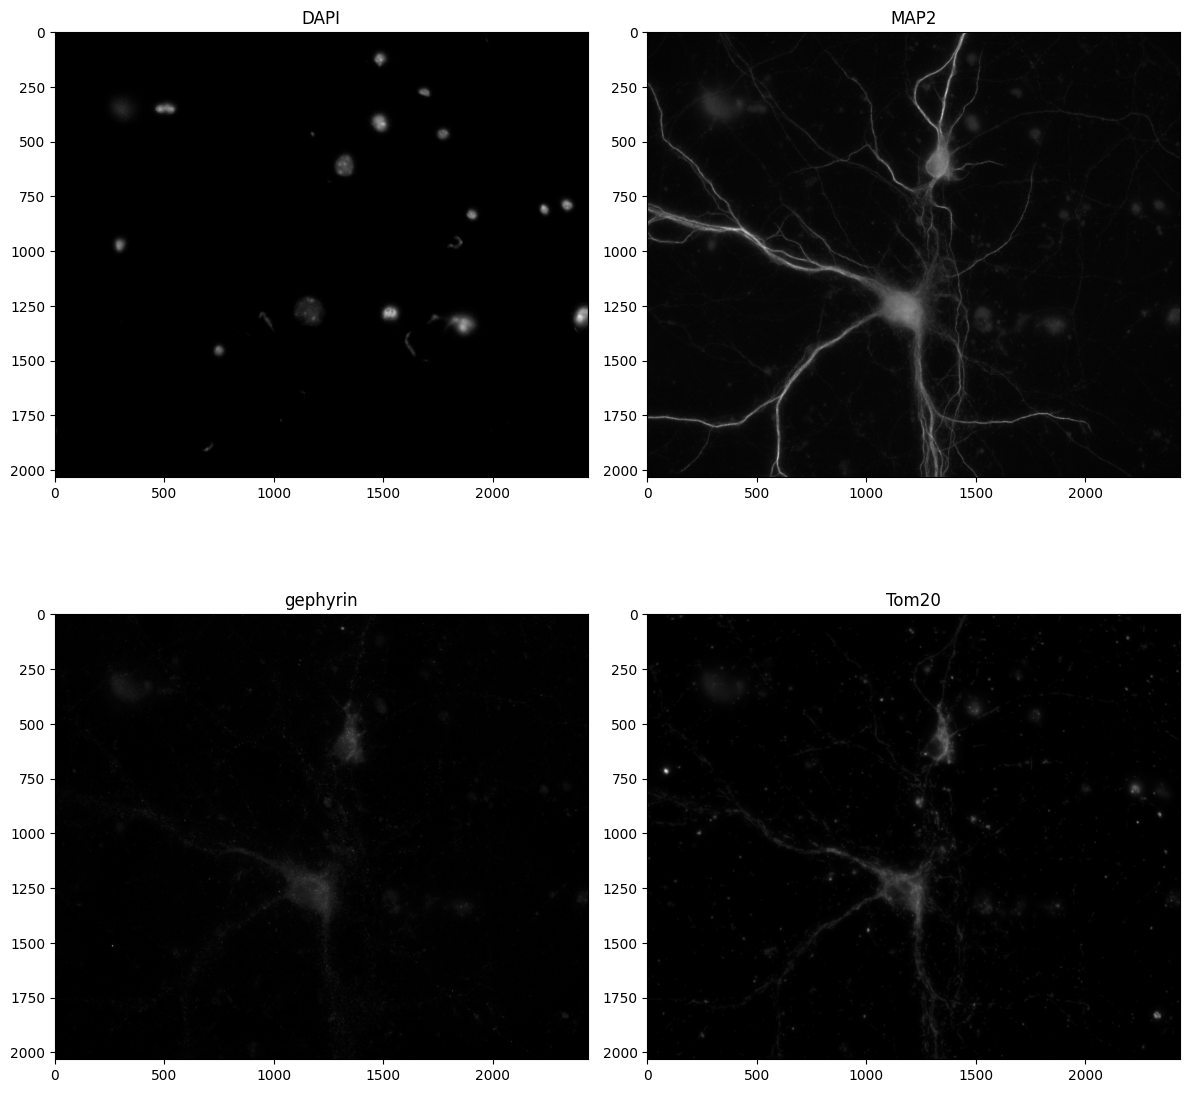

In [12]:
# Pick the first timepoint and z-slice
t_index = 0
z_index = 0

# Extract each channel slice (4 channels)
dapi = data[t_index, z_index, 0,  :, :]
map2 = data[t_index, z_index, 1,  :, :]
gphn = data[t_index, z_index, 2,  :, :]
tom20 = data[t_index, z_index, 3,  :, :]

# make a quick figure to display individual channels
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].imshow(dapi, cmap='gray')
axes[0,0].set_title("DAPI")

axes[0,1].imshow(map2, cmap='gray')
axes[0,1].set_title("MAP2")

axes[1,0].imshow(gphn, cmap='gray')
axes[1,0].set_title("gephyrin")

axes[1,1].imshow(tom20, cmap='gray')
axes[1,1].set_title("Tom20")

plt.tight_layout()
plt.show()

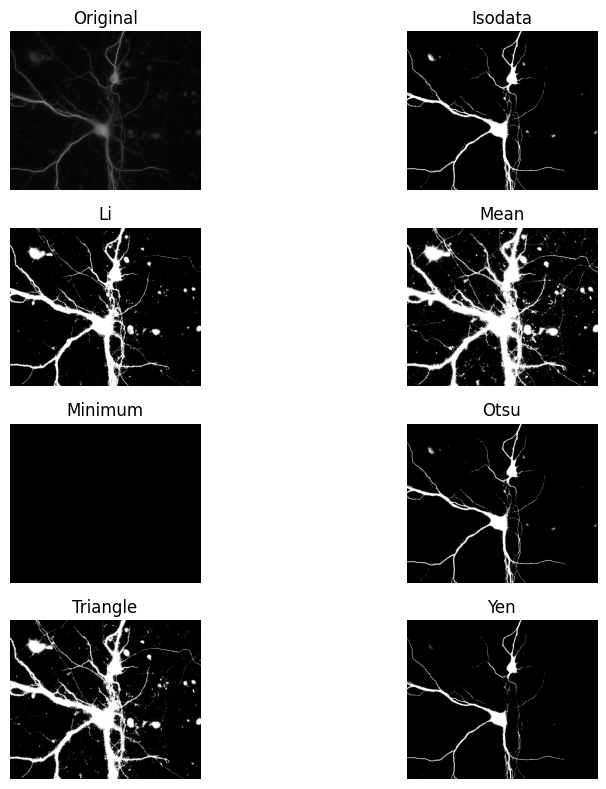

In [13]:
def threshold_all(image):
    return try_all_threshold(image, figsize=(10, 8), verbose=False)

threshold_all(map2)
plt.show()

In [14]:
denoised = gaussian(map2, sigma=2, preserve_range=True)
threshold_map2 = filters.threshold_otsu(denoised)
binary_map2 = denoised >= threshold_map2

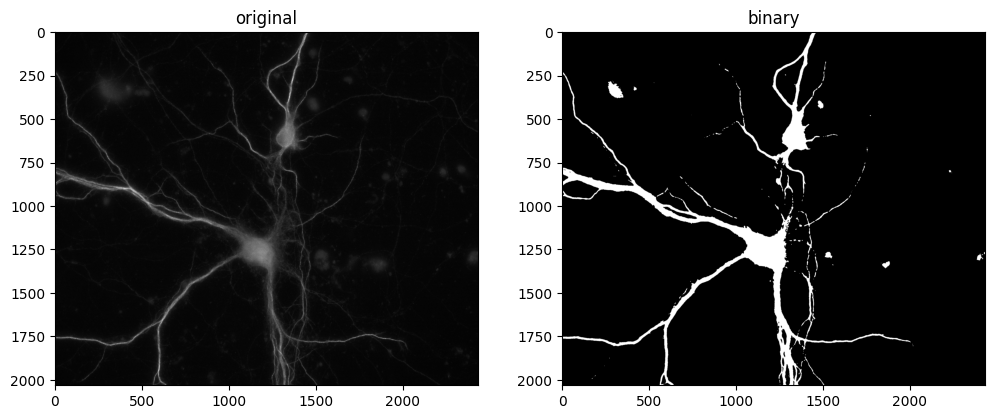

In [15]:
# make a quick figure to display individual channels
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(map2, cmap='gray')
axes[0].set_title("original")

axes[1].imshow(binary_map2, cmap='gray')
axes[1].set_title("binary")

plt.show()

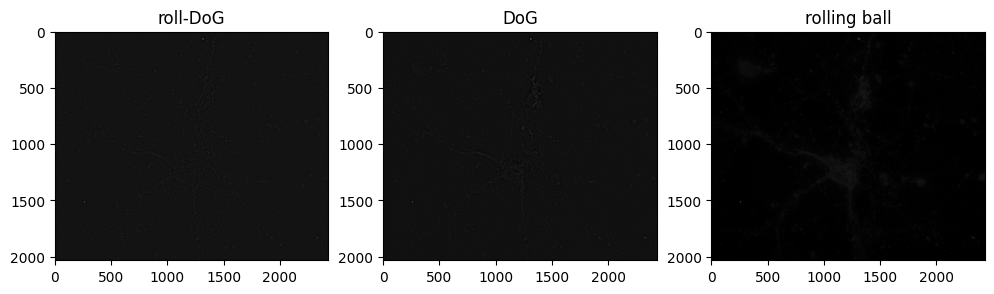

In [16]:
dog = difference_of_gaussians(gphn, 1, 10)
background_rolling = rolling_ball(gphn, radius=10)
rolling = gphn - background_rolling
dog_roll = difference_of_gaussians(rolling, 1, 10)


fig, axes = plt.subplots(1, 3, figsize=(12, 12))

axes[0].imshow(dog_roll, cmap='gray')
axes[0].set_title("roll-DoG")

axes[1].imshow(dog, cmap='gray')
axes[1].set_title("DoG")

axes[2].imshow(rolling, cmap='gray')
axes[2].set_title("rolling ball")

plt.show()



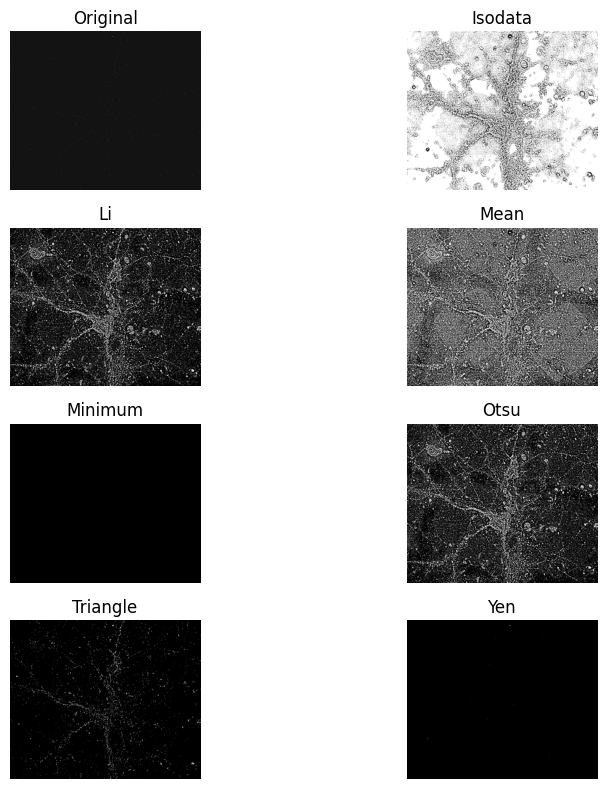

In [17]:
threshold_all(dog_roll)
plt.show()

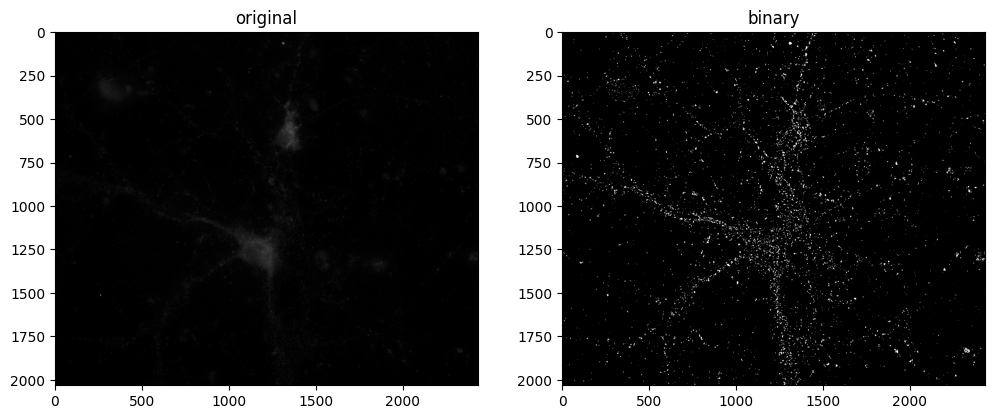

In [18]:
threshold_gphn = filters.threshold_triangle(dog_roll)
binary_gphn = dog_roll >= threshold_gphn

# make a quick figure to display individual channels
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(gphn, cmap='gray')
axes[0].set_title("original")

axes[1].imshow(binary_gphn, cmap='gray')
axes[1].set_title("binary")

plt.show()